In [20]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [32]:

df = pd.read_csv('data.csv', index_col=0,usecols=[0,1,2,3,4,5,6,7,8,9])
df.head(100)

,length,spaces,alpha,numeric,specialchars,hyphen,fslah,bslah,parens
labels,,,,,,,,,
vin,17,0,7,10,0,0,0,0,0
name,9,1,10,0,0,0,0,0,0
name,9,1,8,0,0,0,0,0,0
phone,8,0,0,7,1,1,0,0,0
phone,13,0,10,1,3,1,0,0,2
phone,7,0,0,7,0,0,0,0,0
name,12,0,11,1,0,0,0,0,0
name,7,0,6,1,0,0,0,0,0
name,4,1,12,0,2,1,0,0,0


In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classifier = model.fit(df.values,df.index)

In [35]:
def count_special_character(string): 
    #length,spaces,alpha,numeric,specialchars,hyphen,fslah,bslah,parens
    # Declaring variable for special characters 
    vector = [len(string),0,0,0,0,0,0,0,0]
   
    for i in range(0, len(string)):  
    # len(string) function to count the 
    # number of characters in given string.
      
        ch = string[i]

        #.isalpha() function checks whether character 
        #is alphabet or not.
        if (ch.isalpha()):  
            vector[2] += 1
        
        #.isdigit() function checks whether character 
        #is a number or not.
        elif (ch.isdigit()):
            vector[3] += 1
            
        else:
            vector[4] += 1
            if (ch == " "):
                vector[1] += 1
            elif (ch == "-"):
                vector[5] += 1
            elif (ch == "/"):
                vector[6] += 1
            elif (ch == "\\"):
                vector[7] += 1
            elif (ch == "("  or ch == ")"):
                vector[8] += 1
    return vector


vector = count_special_character('ZARAADCD7FM130307')
vector = count_special_character('1-800-BIG-DUCK')

prediction = classifier.predict([vector])
print(prediction)

import pickle

s = pickle.dumps(classifier)
classifier2  = pickle.loads(s)


prediction = classifier2.predict([vector])
print(prediction)

from joblib import dump, load

dump(classifier2, 'grammar.joblib') 

classifier3 = load('grammar.joblib') 
prediction = classifier3.predict([vector])
print(prediction)


['vin']
['vin']
['vin']


In [36]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'grammar.dot', feature_names = df.columns)

In [37]:
! dot -Tpng grammar.dot -o grammar.png

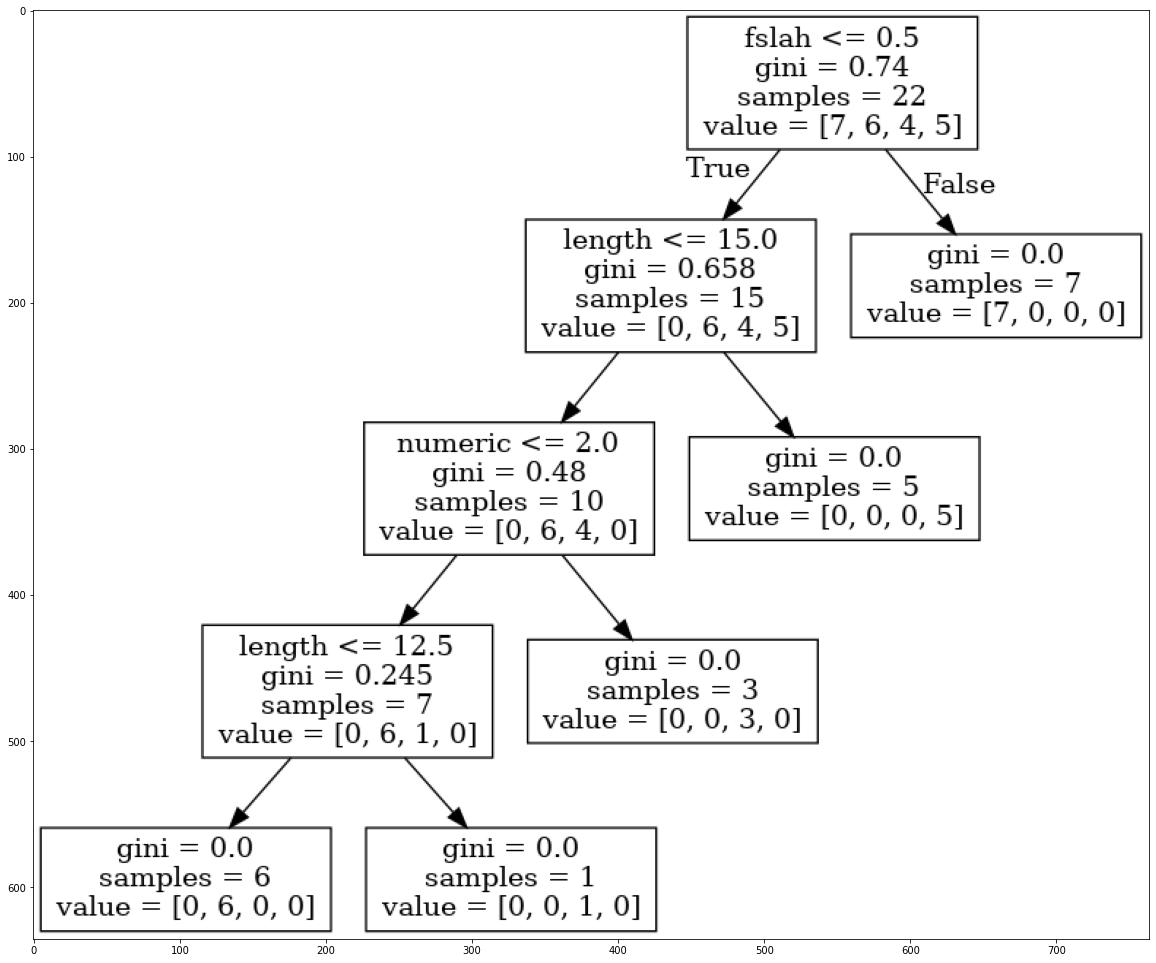

In [38]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('grammar.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)